In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
from time import time
from sklearn.model_selection import GridSearchCV


In [2]:
with open('names.txt') as f:
    words = f.read().split()

In [3]:
soils = []
for i in range(40):
    soils.append('soil'+str(i))

In [4]:
wild_area = []
for i in range(4):
    wild_area.append('wild_area'+str(i))

In [5]:
names = words[1:] + soils + wild_area + ['label']

In [6]:
df = pd.read_csv('covtype.data', names=names)

C:\Users\grech\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


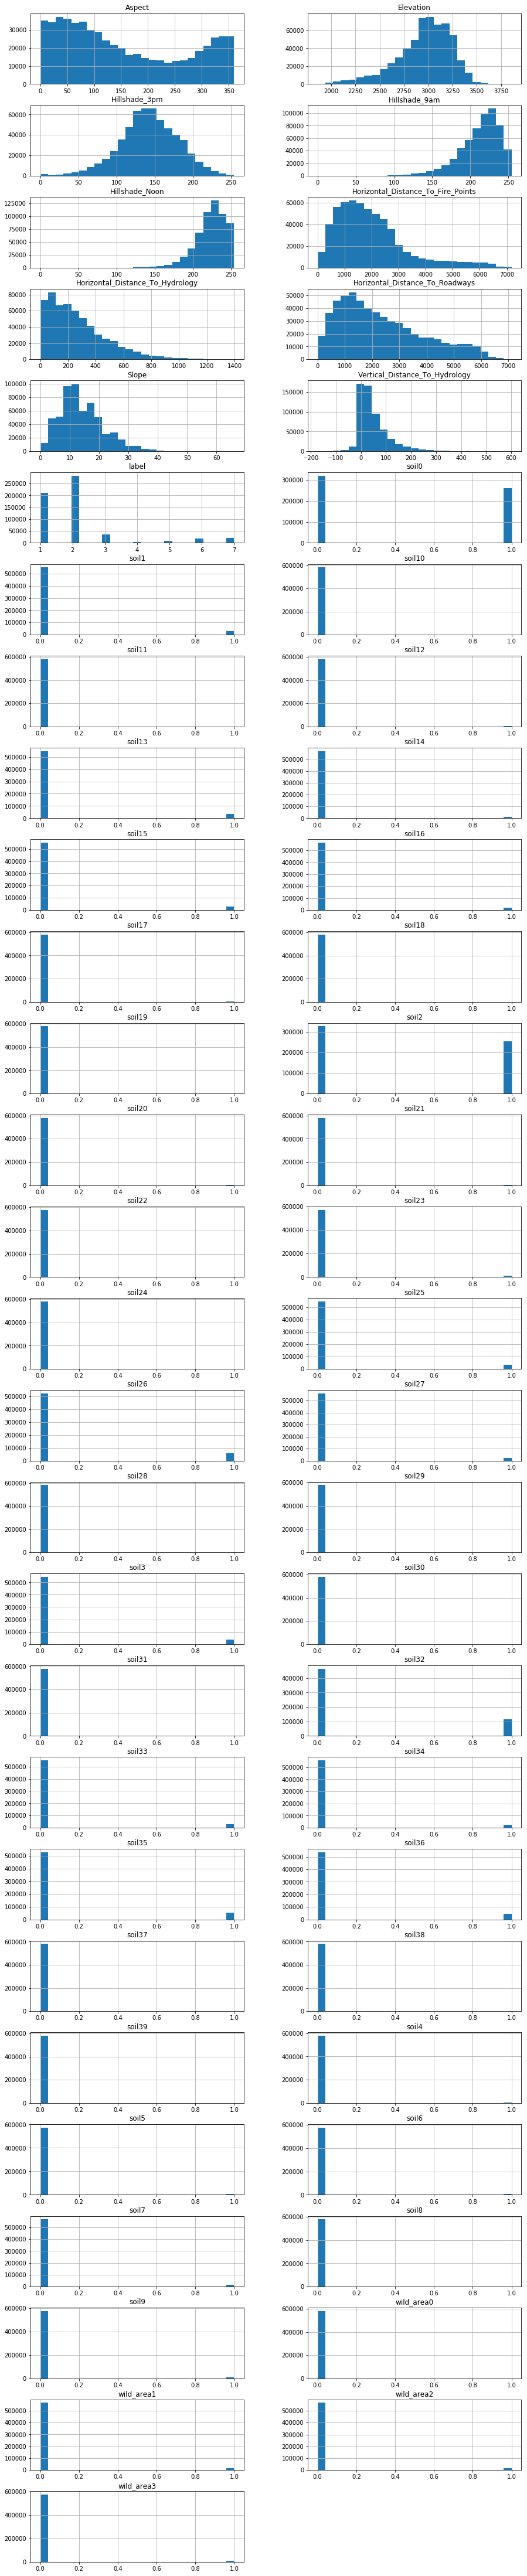

In [7]:
fig = plt.figure(figsize = (15,80))
ax = fig.gca()
df.hist(ax = ax, bins = 25, layout=(-1, 2))
plt.show()

In [8]:
y_all = df.pop('label').values
X_all = df.values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.33, 
                                                    random_state = 5, stratify = y_all)

In [11]:
models = [LogisticRegression(), LinearSVC(), NearestCentroid()]

In [12]:
def perform_cross_validation(X, y, strat = True, scaled = False):
    
    scaler = StandardScaler()
    
    if scaled == True:
        X = scaler.fit_transform(X)
        
    for model in models:
        start = time()
    
        if strat == True:
            scores = cross_val_score(model, X, y, cv=5)
        else:
            scores = cross_val_score(model, X, y, cv=KFold(n_splits=5)) 
            
        end = time()
        print(str(model).split('(')[0] + ' Mean Accuracy', abs(scores).mean(), 'time =', str(end-start))

In [13]:
# Stratified and not scaled
perform_cross_validation(X_train_, y_train_, strat = True, scaled = False)

LogisticRegression Mean Accuracy 0.7177930929478986 time = 4.396827220916748
LinearSVC Mean Accuracy 0.45334156099445977 time = 17.462740659713745
NearestCentroid Mean Accuracy 0.20557159113246537 time = 0.04794478416442871


In [14]:
# Stratified and scaled
perform_cross_validation(X_train_, y_train_, strat = True, scaled = True)

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


LogisticRegression Mean Accuracy 0.7191919005503472 time = 4.681137323379517
LinearSVC Mean Accuracy 0.7159908895408809 time = 21.561322927474976
NearestCentroid Mean Accuracy 0.5539955593259217 time = 0.0334625244140625


In [15]:
# Not stratified and not scaled
perform_cross_validation(X_train_, y_train_, strat = False, scaled = False)

LogisticRegression Mean Accuracy 0.715 time = 4.612468719482422
LinearSVC Mean Accuracy 0.4266 time = 17.65973997116089
NearestCentroid Mean Accuracy 0.20380000000000004 time = 0.03232526779174805


In [16]:
def run_grid_search(model, params, X, y, scaled = True):
    if scaled:
        scaler = StandardScaler()
        X_train_ = scaler.fit_transform(X)
    
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train_, y)
    results = grid.grid_scores_
    
    
    params = []
    scores = []
    for score in results:
        mean = score[1]
        try:
            param = score[0]['C']
        except:
            param = score[0]['shrink_threshold']
            
        scores.append(abs(mean))
        params.append(param)
        
        
    ax = plt.subplot(111)
    ax.scatter(params, scores)
    ax.set_title('Grid Search Results for ' + str(model).split('(')[0])
    ax.set_xlabel('Parameter Tuned')
    ax.set_ylabel('Average Accuracy')
    plt.show()    

In [17]:
param = {'C' : np.linspace(1e-8, 1, 10)}
paramSVC = {'C' : np.linspace(1e-8, 1, 10)}
neighbor_param = {'shrink_threshold' : np.linspace(0.1, 10, 10)}

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\grech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


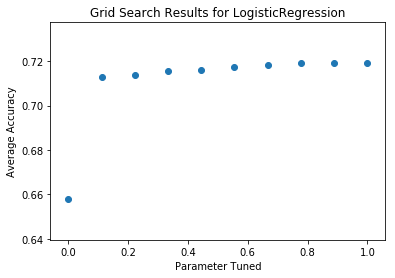

In [18]:
run_grid_search(LogisticRegression(), param, X_train_, y_train_)

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\grech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


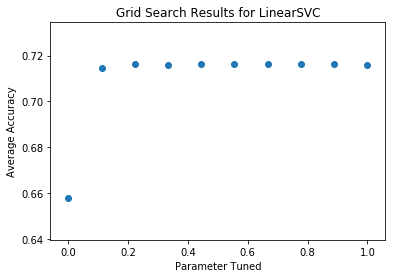

In [19]:
run_grid_search(LinearSVC(), paramSVC, X_train_, y_train_)

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\grech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


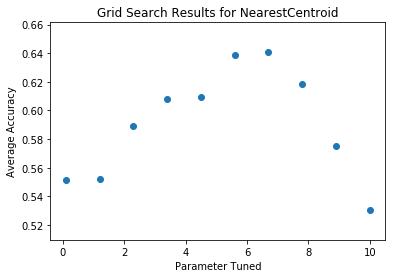

In [20]:
run_grid_search(NearestCentroid(), neighbor_param, X_train_, y_train_)

### Chaging the random seed does not change the best value by much. The LogisticRegression model is fairly good without optimization along with the Support Vector Machine. Changing the cross validation strategy so that it is not stratified sampling hurts the performance of the models, and does not provide the optimum values.

In [21]:
imps = []
for model in models[:-1]:
    model.fit(X_train_, y_train_)
    feature_imp = model.coef_
    imps.append(feature_imp)
    print(str(model))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [22]:
imp1 = imps[0]
imp2 = imps[1]

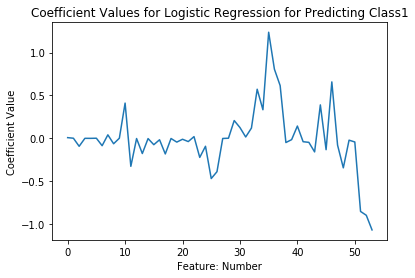

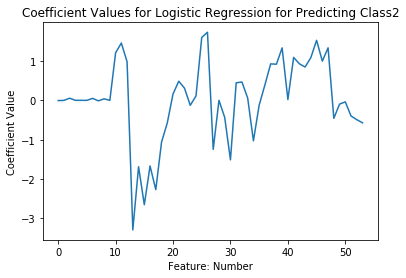

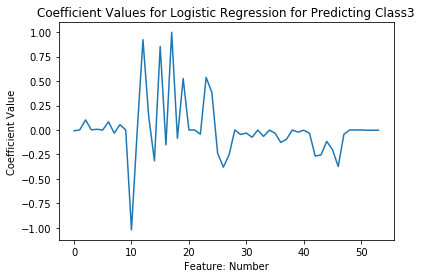

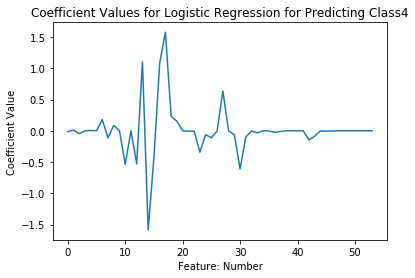

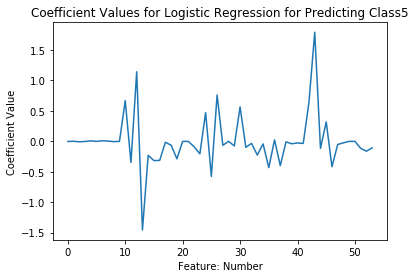

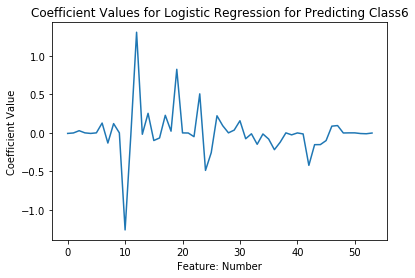

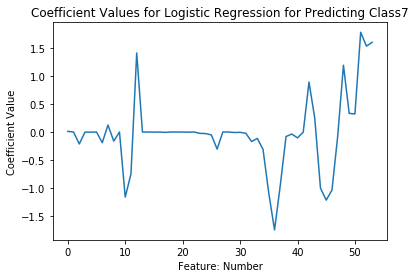

In [26]:
for i, imp in enumerate(imp1):
    ax = plt.subplot(111)
    ax.plot(imp)
    ax.set_title('Coefficient Values for Logistic Regression for Predicting Class' + str(i+1))
    ax.set_xlabel('Feature: Number')
    ax.set_ylabel('Coefficient Value')
    plt.show() 

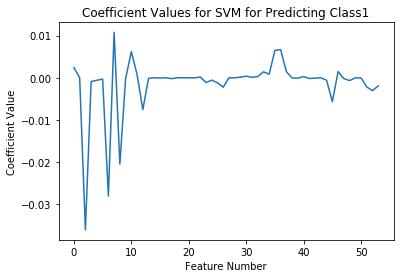

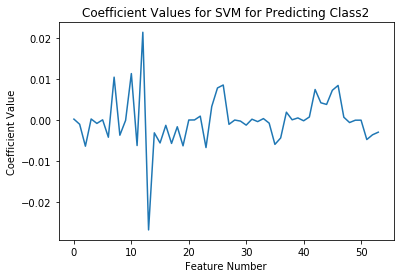

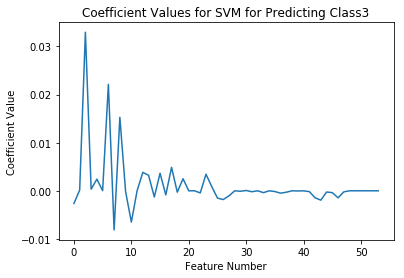

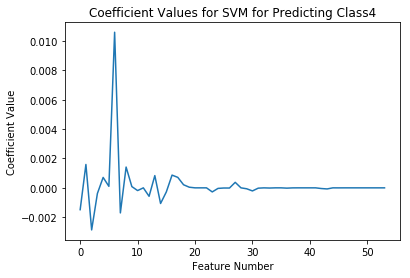

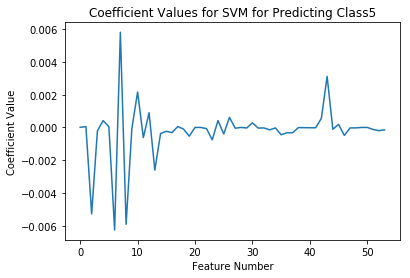

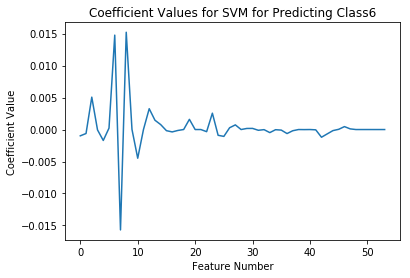

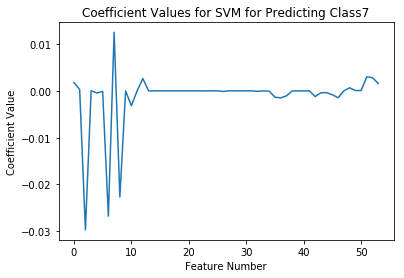

In [27]:
for i, imp in enumerate(imp2):
    ax = plt.subplot(111)
    ax.plot(imp)
    ax.set_title('Coefficient Values for SVM for Predicting Class' + str(i+1))
    ax.set_xlabel('Feature Number')
    ax.set_ylabel('Coefficient Value')
    plt.show() 